In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')

In [3]:
pd.crosstab(rna.obs['fine_clustering'], rna.obs['treatment_timepoint'])

treatment_timepoint,Saline_pre,Saline_post,1.5MIU_pre,1.5MIU_post,2.5MIU_pre,2.5MIU_post
fine_clustering,,,,,,
B_naive,686,913,987,598,1899,760
B_non-switched_memory,285,361,462,249,672,287
B_switched_memory,196,243,350,197,485,224
CD4_CD25_IL17RB_T/NKT,0,0,0,1,0,16
CD4_Tcm,1878,2235,3638,2745,4286,6287
CD4_Tem,132,167,343,265,315,630
CD4_Tnaive,1174,1739,1919,1919,3195,3859
CD4_Treg,190,249,243,618,211,1594
CD8_Tem,805,642,2569,1564,2797,2642


In [4]:
import sys
sys.path.append('/lustre/scratch117/cellgen/team297/kt16/scripts')
from tools import returnDEres

## DE analysis for 2.5 vs untreated, 1.5 vs untreated, 2.5 vs 1.5 in Tregs
Volcanoplot

In [5]:
treg = rna[rna.obs['fine_clustering'] == 'CD4_Treg'].copy()
treg

AnnData object with n_obs × n_vars = 3105 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
treg.obs

,sampleid,sampleid_study,timepoint,treatment,study_id,scrublet_score,n_genes,percent_mito,n_counts,is_doublet,...,fine_clustering,treatment_timepoint,sex,age,peak_trop,BNP,on_treatment_CRP,AEs,treatment_group_1,treatment_group_2
Sample_Fq1_AACTCCCTCTGCCAGG,Sample_Fq1,L6010T2,pre,Saline,L6010,0.081781,1036,1.852410,2359.336055,False,...,CD4_Treg,Saline_pre,male,61,999,75,1.5,0,untreated,untreated
Sample_Fq1_ACATACGAGGACAGCT,Sample_Fq1,L6010T2,pre,Saline,L6010,0.057718,977,2.147067,2218.636484,False,...,CD4_Treg,Saline_pre,male,61,999,75,1.5,0,untreated,untreated
Sample_Fq1_ACCGTAACACCAGCAC,Sample_Fq1,L6010T2,pre,Saline,L6010,0.029502,462,2.741314,845.602930,False,...,CD4_Treg,Saline_pre,male,61,999,75,1.5,0,untreated,untreated
Sample_Fq1_ACGCCAGTCTTACCTA,Sample_Fq1,L6010T2,pre,Saline,L6010,0.081781,1314,3.221343,3601.079524,False,...,CD4_Treg,Saline_pre,male,61,999,75,1.5,0,untreated,untreated
Sample_Fq1_ACTGCTCGTACGACCC,Sample_Fq1,L6010T2,pre,Saline,L6010,0.076205,913,1.850135,1895.869096,False,...,CD4_Treg,Saline_pre,male,61,999,75,1.5,0,untreated,untreated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_Fq32_TGTCCCATCCACGAAT,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.055690,619,2.871218,1407.236414,False,...,CD4_Treg,2.5MIU_post,male,73,319,936,19.7,1,2.5MIU,treated
Sample_Fq32_TGTTCCGGTGAACCTT,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.062340,593,5.153135,987.570682,False,...,CD4_Treg,2.5MIU_post,male,73,319,936,19.7,1,2.5MIU,treated
Sample_Fq32_TTAGGACCATGTTGAC,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.032010,1086,3.306757,3409.990915,False,...,CD4_Treg,2.5MIU_post,male,73,319,936,19.7,1,2.5MIU,treated
Sample_Fq32_TTGCGTCCAAGAGGCT,Sample_Fq32,L7003T7,post,2.5MIU,L7003,0.040673,848,3.956338,2084.884909,False,...,CD4_Treg,2.5MIU_post,male,73,319,936,19.7,1,2.5MIU,treated


In [21]:
sc.tl.rank_genes_groups(treg, groupby = 'treatment_group_1', reference = 'untreated', method = 'wilcoxon', n_genes = 30000, pts=True)

In [22]:
if not os.path.exists('DEG'):
    os.makedirs('DEG')

In [23]:
returnDEres(treg, column = '2.5MIU').to_csv('DEG/Treg_2.5MIUvsUntreated_wilcoxon.csv')
returnDEres(treg, column = '1.5MIU').to_csv('DEG/Treg_1.5MIUvsUntreated_wilcoxon.csv')

In [9]:
sc.tl.rank_genes_groups(treg, groupby = 'treatment_group_1', reference = '1.5MIU', method = 'wilcoxon', n_genes = 30000, pts = True)

In [11]:
returnDEres(treg, column = '2.5MIU').to_csv('DEG/Treg_2.5MIUvs1.5MIU_wilcoxon.csv')

## treated vs non-treated (only post)
1) All T cell types - gene expression dot plot?

2) Dotplot for Treg functions/molecules

3) Cytokine/Chemokine ligand + receptors dotplots

In [19]:
adata2 = rna[rna.obs['timepoint'] == 'post'].copy()
adata2

AnnData object with n_obs × n_vars = 103847 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [23]:
from collections import defaultdict
adatax = defaultdict(dict)
for x in ['CD4_Treg', 'CD4_Tcm', 'CD4_Tem', 'CD4_Tnaive', 'CD8_Tem', 'CD8_Temra', 'CD8_Tnaive']:
    adatax[x] = adata2[adata2.obs['fine_clustering'] == x].copy()

In [25]:
for x in adatax:
    sc.tl.rank_genes_groups(adatax[x], groupby = 'treatment_group_2', reference = 'untreated', method = 'wilcoxon', n_genes = 30000, pts=True)

In [26]:
for x in adatax:
    returnDEres(adatax[x], column = 'treated').to_csv('DEG/'+x+'_TreatedvsUntreated_wilcoxon.csv')

In [ ]:
## dotplots for chemokine/cytokines

In [132]:
adata2 = rna[rna.obs['fine_clustering'].isin(['CD4_Treg', 'CD4_Tcm', 'CD4_Tem', 'CD4_Tnaive', 'CD8_Tem', 'CD8_Temra', 'CD8_Tnaive'])].copy()
adata2

AnnData object with n_obs × n_vars = 73826 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [133]:
adata2 = adata2[adata2.obs.timepoint == 'post']
adata2 = adata2.raw.to_adata()
adata2.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000238009,Gene Expression,False,48,0.000203,99.979657,47.910553,41,False,0.001283,2.194514,0.126460
AL627309.2,ENSG00000239906,Gene Expression,False,12,0.000051,99.994914,11.921763,11,False,0.000331,2.026852,-0.277338
AL669831.5,ENSG00000237491,Gene Expression,False,591,0.002454,99.749522,579.089417,475,False,0.012285,2.007679,-0.323515
FAM87B,ENSG00000177757,Gene Expression,False,27,0.000113,99.988557,26.742092,22,False,0.000653,2.112959,-0.069958
LINC00115,ENSG00000225880,Gene Expression,False,1304,0.005496,99.447338,1296.692627,1133,False,0.032796,2.326272,0.443789
...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,False,157,0.000657,99.933460,155.127823,123,False,0.003436,2.045849,-0.231585
AC004556.1,ENSG00000276345,Gene Expression,False,1615,0.006936,99.315530,1636.595703,1397,False,0.030285,1.853748,-0.694244
AC233755.2,ENSG00000277856,Gene Expression,False,23,0.000186,99.990252,44.000000,19,False,0.001423,3.684731,3.715515
AC233755.1,ENSG00000275063,Gene Expression,False,135,0.007627,99.942784,1799.661499,104,True,0.019201,4.364148,5.351830


In [134]:
sc.pp.filter_genes(adata2, min_cells = 3)

In [135]:
adata2

AnnData object with n_obs × n_vars = 37981 × 16773
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [136]:
adata2 = adata2[:, adata2.var['n_cells'] >= (.1 * 37981)].copy()
adata2

AnnData object with n_obs × n_vars = 37981 × 1842
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [137]:
import re

In [138]:
chemokine_receptors = [i for i in adata2.var.index if re.search('CXCR|CCR|CX3CR|XCR', i)]
chemokines = [i for i in adata2.var.index if re.search('CXC|CCl|CX3Cl|XCl', i)]

In [139]:
cytokines_ = [i for i in adata2.var.index if re.search('^IL[0-9]|^TNF$|^TGF', i)]
cytokine_receptors = [i for i in cytokines_ if re.search('R', i) and not re.search('-AS|AP|[ECLNT]$', i)]
cytokines = [i for i in cytokines_ if not re.search('R|-AS|BP|I1|[IT]$', i)]

In [140]:
TNFsuperfamily = [i for i in adata2.var.index if re.search('^TNFSF|TNFRSF', i)]
TNFsuperfamily_receptors = [i for i in TNFsuperfamily if re.search('R', i) and not re.search('-|-AS|AP', i)]
TNFsuperfamily_ligands = [i for i in TNFsuperfamily if not re.search('R|-', i)]

In [141]:
ligands = {'chemokines':chemokines, 'cytokines\n':cytokines, 'TNF superfamily':TNFsuperfamily_ligands}
receptors = {'chemokine receptors':chemokine_receptors, 'cytokine receptors\n':cytokine_receptors, 'TNF superfamily':TNFsuperfamily_receptors}

In [142]:
adata2.obs['celltype_treatment_group_1'] = [c +'_' + x for c,x in zip(adata2.obs['fine_clustering'], adata2.obs['treatment_group_1'])]

In [143]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

... storing 'celltype_treatment_group_1' as categorical


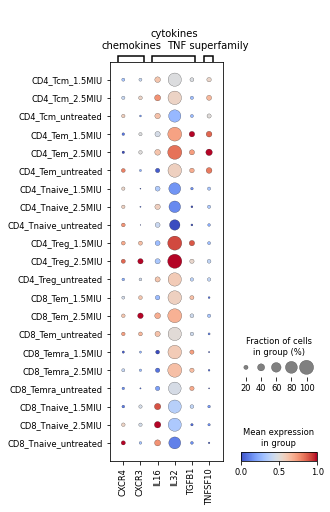

In [144]:
sc.pl.dotplot(adata2, ligands, standard_scale = 'var', color_map = 'coolwarm', var_group_rotation = 0, groupby = 'celltype_treatment_group_1', dendrogram = False, save = 'ligands_Tcells.pdf')

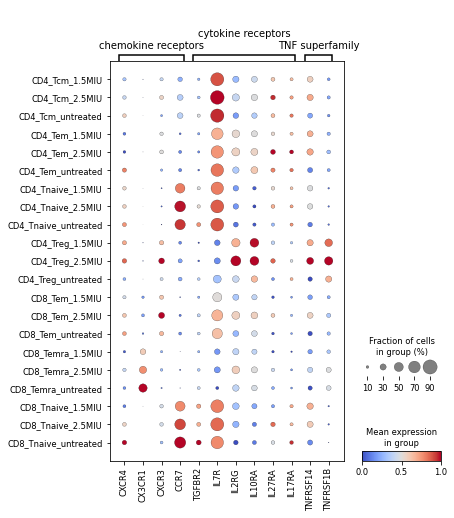

In [145]:
sc.pl.dotplot(adata2, receptors, standard_scale = 'var', color_map = 'coolwarm', var_group_rotation = 0, groupby = 'celltype_treatment_group_1', dendrogram = False, save = 'receptors_Tcells.pdf')

In [155]:
table = pd.crosstab(adata2.obs['treatment_group_1'], adata2.obs['fine_clustering'])
table

fine_clustering,CD4_Tcm,CD4_Tem,CD4_Tnaive,CD4_Treg,CD8_Tem,CD8_Temra,CD8_Tnaive
treatment_group_1,,,,,,,
1.5MIU,2745,265,1919,618,1564,3585,280
2.5MIU,6287,630,3859,1594,2642,5012,606
untreated,2235,167,1739,249,642,1079,264


In [156]:
def absolute_value(val):
    a  = round(val,2)
    return a

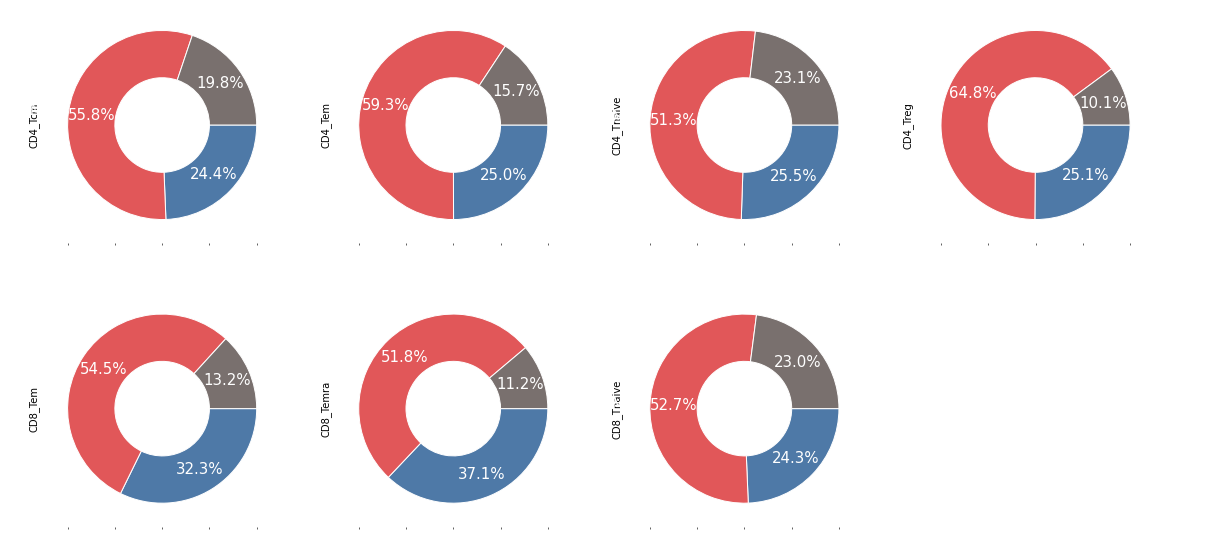

In [157]:
import matplotlib.pyplot as plt
# for x in final.columns:
table.plot.pie(autopct='%1.1f%%', 
               textprops={'fontsize': 15, 'color':'white'}, 
               pctdistance=0.75, 
               wedgeprops=dict(width=0.5, edgecolor='w'),
               colors = [dict(zip(['untreated', '1.5MIU', '2.5MIU'], ['#79706e', '#4e79a7', '#e15759']))[i] for i in table.index], 
               legend=False, 
               counterclock=False, subplots=True, figsize=(20, 20),
               layout = (4,4))
plt.savefig('figures/Tcell_piecharts.pdf')

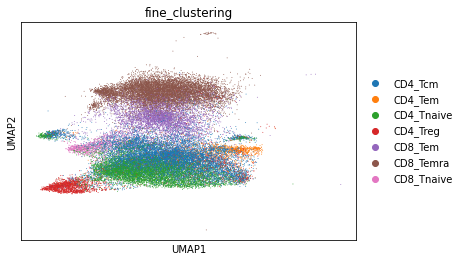

In [158]:
sc.pl.umap(adata2, color = 'fine_clustering')

In [126]:
adata2.uns['treatment_timepoint_colors']

array(['#bab0ac', '#79706e', '#a0cbe8', '#4e79a7', '#fb9a99', '#e15759'],
      dtype=object)

In [149]:
pd.crosstab(rna.obs['sampleid'], rna.obs['fine_clustering']).to_csv('all_cell_counts_splitbysampleid.csv')